In [1]:
# pip install missingno

In [2]:
import pandas as pd
import numpy as np
import folium
import missingno as msno
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
import matplotlib.pyplot as plt
import seaborn as sns

## About the dataset

This dataset comes from the Orlando Police Department records management system. You can use the [link](https://data.cityoforlando.net/Orlando-Police/OPD-Crimes/4y9m-jbmz) to download the dataset.

## What's in the dataset?

- Rows: 238k
- Columns: 10
- Updated: June 24, 2021

In [3]:
df = pd.read_csv("data/OPD_Crimes.csv")
df.head()

,Case Number,Case Date Time,Case Location,Case Offense Location Type,Case Offense Category,Case Offense Type,Case Offense Charge Type,Case Disposition,Status,Location
0,2020-00000700,01/01/2020 03:44:00 PM,9400 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Open,Unmapped,NaN
1,2019-00002818,01/03/2019 08:22:00 AM,4900 Block of FIJI CIR,Residence/Single,Theft,All other larceny,Committed,Closed,Mapped,"(28.60235426, -81.43691172)"
2,2020-00004890,01/05/2020 09:48:00 AM,9300 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Closed,Unmapped,NaN
3,2020-00007368,01/07/2020 01:04:00 PM,4700 Block of N PINE HILLS RD,Apartment/Condo,Robbery,Robbery,Committed,Arrest,Mapped,"(28.60018728, -81.45147832)"
4,2020-00008073,01/08/2020 01:18:00 AM,9400 Block of JEFF FUQUA BLVD,Airport,Theft,All other larceny,Committed,Closed,Unmapped,NaN


In [4]:
df.drop(columns=['Case Date Time','Case Number','Case Location','Status'], inplace=True)
df.rename(columns={"Case Offense Location Type":"Location Type","Case Offense Category":"Offense Category","Case Disposition":"Case Status"}, inplace=True)
df.head()

,Location Type,Offense Category,Case Offense Type,Case Offense Charge Type,Case Status,Location
0,Airport,Theft,All other larceny,Committed,Open,NaN
1,Residence/Single,Theft,All other larceny,Committed,Closed,"(28.60235426, -81.43691172)"
2,Airport,Theft,All other larceny,Committed,Closed,NaN
3,Apartment/Condo,Robbery,Robbery,Committed,Arrest,"(28.60018728, -81.45147832)"
4,Airport,Theft,All other larceny,Committed,Closed,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238491 entries, 0 to 238490
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Location Type             238491 non-null  object
 1   Offense Category          238491 non-null  object
 2   Case Offense Type         238491 non-null  object
 3   Case Offense Charge Type  238491 non-null  object
 4   Case Status               238491 non-null  object
 5   Location                  228265 non-null  object
dtypes: object(6)
memory usage: 10.9+ MB


<AxesSubplot:>

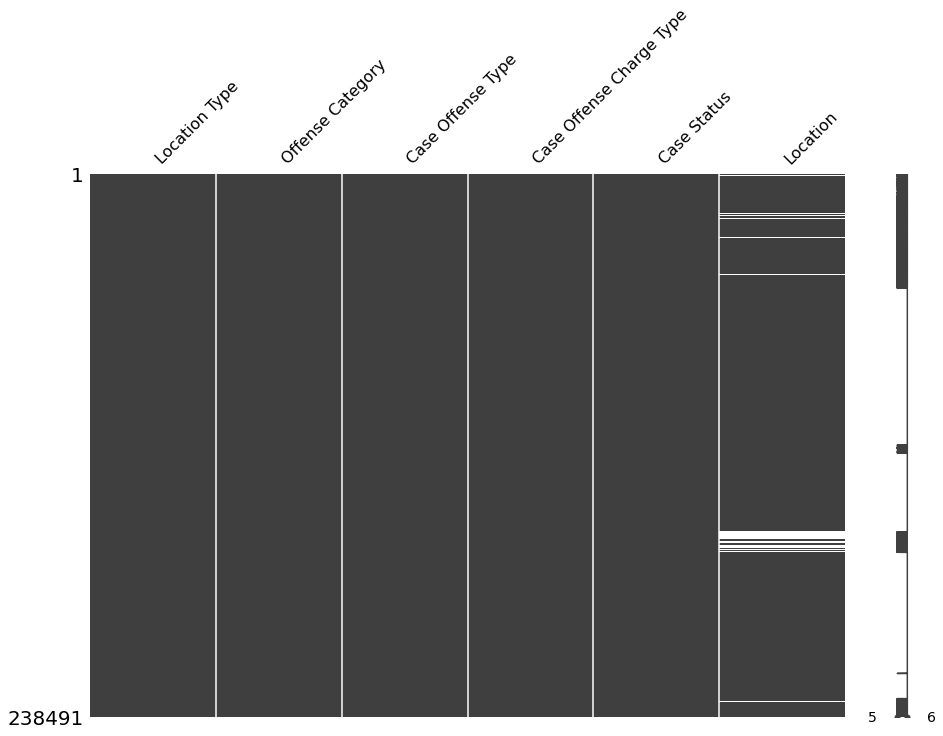

In [6]:
# Check null values in the dataset

msno.matrix(df, figsize=(15,10))

In [7]:
df.dropna(inplace=True)
df.head()

,Location Type,Offense Category,Case Offense Type,Case Offense Charge Type,Case Status,Location
1,Residence/Single,Theft,All other larceny,Committed,Closed,"(28.60235426, -81.43691172)"
3,Apartment/Condo,Robbery,Robbery,Committed,Arrest,"(28.60018728, -81.45147832)"
6,Apartment/Condo,Assault,Simple assault,Committed,Inactive,"(28.51715097, -81.33099064)"
12,Highway/Road/Alley,Assault,Simple assault,Committed,Inactive,"(28.51083543, -81.31031512)"
18,Bus/Rail Terminal,Assault,Simple assault,Committed,Arrest,"(28.54799721, -81.41373753)"


In [8]:
location_df = df['Location'].str.strip('()').str.split(',', expand=True).rename(columns={0: 'Latitude', 1: 'Longitude'})
df[['latitude','longitude']] = location_df[['Latitude', 'Longitude']]

In [9]:
df['Location Type'].unique()

array(['Residence/Single', 'Apartment/Condo', 'Highway/Road/Alley',
       'Bus/Rail Terminal', 'Mall', 'Hardware Store', 'Clothing Store',
       'School', 'Drug Store', 'Convenience Store', 'Hotel/Motel',
       'Field/Woods', 'Department/Discount Store', 'Airport',
       'Parking Lot - Surface', 'Parking Lot - Mall', 'Parking Garage',
       'Construction Site', 'Grocery/Supermarket', 'Specialty Store',
       'Bank/Financial Institution', 'Bar/Night Club/Country Club',
       'Residence/Other', 'Vacant Apartment', 'Other', 'Gas Station',
       'Cell Phone Store', 'Industrial/Mfg', 'Hospital',
       'Vacant/Commercial', 'Barber/Beauty Shop', 'Sporting Goods',
       'Liquor/Beer/Wine Store', 'Residence/Shelter/Transient',
       'Commercial/Office Building', 'Auto Dealer/Car Lot',
       'Restaurant/Other', 'Theme Park', 'Motor Vehicle', 'Jewelry Store',
       'Theater', 'Jail/Prison', 'Restaurant/Fine Dining',
       'Restaurant/Fast Food', 'Storage Unit',
       'Governemnt Bu

In [10]:
df.head()

,Location Type,Offense Category,Case Offense Type,Case Offense Charge Type,Case Status,Location,latitude,longitude
1,Residence/Single,Theft,All other larceny,Committed,Closed,"(28.60235426, -81.43691172)",28.60235426,-81.43691172
3,Apartment/Condo,Robbery,Robbery,Committed,Arrest,"(28.60018728, -81.45147832)",28.60018728,-81.45147832
6,Apartment/Condo,Assault,Simple assault,Committed,Inactive,"(28.51715097, -81.33099064)",28.51715097,-81.33099064
12,Highway/Road/Alley,Assault,Simple assault,Committed,Inactive,"(28.51083543, -81.31031512)",28.51083543,-81.31031512
18,Bus/Rail Terminal,Assault,Simple assault,Committed,Arrest,"(28.54799721, -81.41373753)",28.54799721,-81.41373753


In [11]:
# Exploration from the dataset
df['Location Type'].value_counts()[:10]

Apartment/Condo                40542
Residence/Single               30429
Highway/Road/Alley             26827
Parking Lot - Surface          15566
Department/Discount Store      14224
Commercial/Office Building      8878
Bar/Night Club/Country Club     7163
Convenience Store               6273
Hotel/Motel                     6201
Airport                         6016
Name: Location Type, dtype: int64

In [12]:
df['Offense Category'].value_counts()[:10]

Theft            116077
Burglary          29229
Assault           25692
Narcotics         23404
Fraud             15173
Vehicle Theft     11766
Robbery            6255
Arson               289
Homicide            202
Kidnapping          119
Name: Offense Category, dtype: int64

In [13]:
locations = df[['latitude','longitude','Location Type', 'Offense Category', 'Case Status']]
locations.reset_index(drop=True, inplace=True)
locations.head()

,latitude,longitude,Location Type,Offense Category,Case Status
0,28.60235426,-81.43691172,Residence/Single,Theft,Closed
1,28.60018728,-81.45147832,Apartment/Condo,Robbery,Arrest
2,28.51715097,-81.33099064,Apartment/Condo,Assault,Inactive
3,28.51083543,-81.31031512,Highway/Road/Alley,Assault,Inactive
4,28.54799721,-81.41373753,Bus/Rail Terminal,Assault,Arrest


In [14]:
locations['latitude'] = locations['latitude'].astype(float)
locations['longitude'] = locations['longitude'].astype(float)

C:\Users\aliso\AppData\Local\Temp/ipykernel_25700/1715410766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['latitude'] = locations['latitude'].astype(float)
C:\Users\aliso\AppData\Local\Temp/ipykernel_25700/1715410766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations['longitude'] = locations['longitude'].astype(float)


In [15]:
unique_locations = df['Location'].value_counts()

In [16]:
crime_index = pd.DataFrame({"Raw_String": unique_locations.index, "ValueCount":unique_locations})
crime_index.index = range(len(unique_locations))

In [17]:
crime_index.head()

,Raw_String,ValueCount
0,"(28.43180352, -81.30852827)",4736
1,"(28.47391409, -81.44958996)",3284
2,"(28.48698571, -81.42773469)",2202
3,"(28.51478741, -81.45909997)",2051
4,"(28.47723397, -81.47324116)",1655


In [18]:
crime_index.Raw_String.describe

<bound method NDFrame.describe of 0          (28.43180352, -81.30852827)
1          (28.47391409, -81.44958996)
2          (28.48698571, -81.42773469)
3          (28.51478741, -81.45909997)
4          (28.47723397, -81.47324116)
                     ...              
20005    (28.563415988, -81.389328994)
20006     (28.526465831, -81.39770552)
20007      (28.38993626, -81.26591725)
20008      (28.53218191, -81.31653887)
20009    (28.552728906, -81.366532153)
Name: Raw_String, Length: 20010, dtype: object>

In [19]:
def location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat = float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [20]:
crime_index['location'] = crime_index['Raw_String'].apply(location_extractor)

In [21]:
crime_index = crime_index.drop(columns=['Raw_String'], axis=1)

In [22]:
crime_index

,ValueCount,location
0,4736,"(28.43180352, -81.30852827)"
1,3284,"(28.47391409, -81.44958996)"
2,2202,"(28.48698571, -81.42773469)"
3,2051,"(28.51478741, -81.45909997)"
4,1655,"(28.47723397, -81.47324116)"
...,...,...
20005,1,"(28.563415988, -81.389328994)"
20006,1,"(28.526465831, -81.39770552)"
20007,1,"(28.38993626, -81.26591725)"
20008,1,"(28.53218191, -81.31653887)"


In [23]:
orlando_crime_map = folium.Map(location=[28.5384, -81.3789], zoom_start=11, tiles="CartoDB dark_matter")

for i in range(500):
    lat = crime_index['location'].iloc[i][0]
    long = crime_index['location'].iloc[i][1]
    radius = crime_index['ValueCount'].iloc[i] / 45

    if crime_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(orlando_crime_map)

In [24]:
orlando_crime_map

In [25]:
df_res = df[df['Location Type'] == 'Restaurant/Other']
df_res.reset_index(drop=True, inplace=True)
df_res.head()

,Location Type,Offense Category,Case Offense Type,Case Offense Charge Type,Case Status,Location,latitude,longitude
0,Restaurant/Other,Theft,All other larceny,Committed,Closed,"(28.46747266, -81.31008722)",28.46747266,-81.31008722
1,Restaurant/Other,Theft,Theft from motor vehicle except parts/accessories,Committed,Closed,"(28.46174158, -81.31006093)",28.46174158,-81.31006093
2,Restaurant/Other,Theft,Pocket picking,Committed,Closed,"(28.48698571, -81.42773469)",28.48698571,-81.42773469
3,Restaurant/Other,Theft,Theft from building,Committed,Closed,"(28.55342308, -81.33947697)",28.55342308,-81.33947697
4,Restaurant/Other,Theft,All other larceny,Committed,Closed,"(28.55342308, -81.33947697)",28.55342308,-81.33947697


In [26]:
df_res['latitude'] = df_res['latitude'].astype(float)
df_res['longitude'] = df_res['longitude'].astype(float)

C:\Users\aliso\AppData\Local\Temp/ipykernel_25700/1458438103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['latitude'] = df_res['latitude'].astype(float)
C:\Users\aliso\AppData\Local\Temp/ipykernel_25700/1458438103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['longitude'] = df_res['longitude'].astype(float)


In [27]:
counts_list = list(df_res['Offense Category'].unique())

In [28]:
df_res_data = pd.DataFrame({"Counts": df_res['Offense Category'].value_counts(), "Description": counts_list})
df_res_data.reset_index(drop=True, inplace=True)
df_res_data

,Counts,Description
0,399,Theft
1,132,Narcotics
2,116,Assault
3,104,Fraud
4,23,Vehicle Theft
5,19,Burglary
6,17,Robbery
7,1,Homicide


<AxesSubplot:xlabel='Counts', ylabel='Description'>

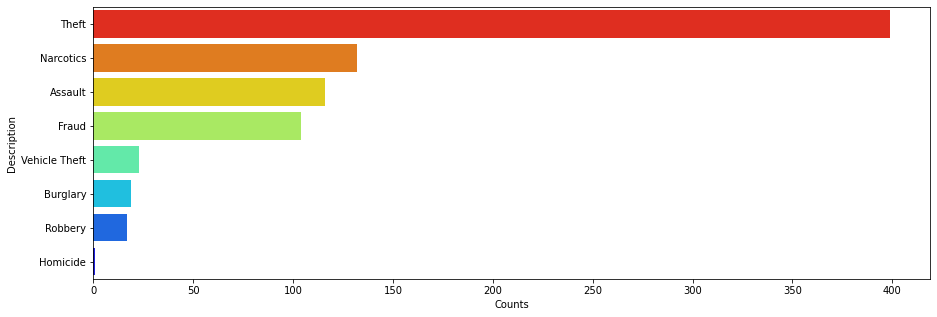

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Description", x = "Counts", data = df_res_data, palette="jet_r")

In [30]:
res_crime_location = df_res['Location'].value_counts()
res_crime_location.head()

(28.54081518, -81.37902128)     29
(28.54170622, -81.37903842)     28
(28.52292187, -81.31183137)     14
(28.48698571, -81.42773469)     12
(28.536754325, -81.31052233)    12
Name: Location, dtype: int64

In [31]:
res_crime_index = pd.DataFrame({"Raw_String": res_crime_location.index, "ValueCount":res_crime_location})
res_crime_index.index = range(len(res_crime_location))
res_crime_index.head()

,Raw_String,ValueCount
0,"(28.54081518, -81.37902128)",29
1,"(28.54170622, -81.37903842)",28
2,"(28.52292187, -81.31183137)",14
3,"(28.48698571, -81.42773469)",12
4,"(28.536754325, -81.31052233)",12


In [32]:
res_crime_index['location'] = res_crime_index['Raw_String'].apply(location_extractor)

In [33]:
res_crime_index = res_crime_index.drop(columns=['Raw_String'], axis=1)

In [34]:
orlando_map = folium.Map(location=[28.5384, -81.3789], zoom_start=11, tiles="CartoDB dark_matter")

for i in range(50):
    lat = res_crime_index['location'].iloc[i][0]
    long = res_crime_index['location'].iloc[i][1]
    radius = int(res_crime_index['ValueCount'].iloc[i])
    
    if res_crime_index['ValueCount'].iloc[i] > 20:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               res_crime_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(orlando_map)

In [35]:
orlando_map